In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def tanh(x):
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def relu(x):
  return np.maximum(0, x)

In [3]:
x1 = 3
x2 = 2
y_actual = 17

In [4]:
np.random.seed(42)  # For reproducibility
w1 = np.random.randint(1, 10)
w2 = np.random.randint(1, 10)

In [5]:
# Define functions
def predict(x1, x2, w1, w2):
  return x1 * w1 + x2 * w2

def error(y_actual, y_pred):
  # Scale the error to prevent overflow
  return ((y_actual - y_pred) ** 2) / 1000000  # Adjust the scaling factor as needed

def gradient_w1(x1, error):
  return -2 * x1 * error

def gradient_w2(x2, error):
  return -2 * x2 * error

def update_weights(w1, w2, gradient_w1, gradient_w2, learning_rate):
  w1 = w1 - learning_rate * gradient_w1
  w2 = w2 - learning_rate * gradient_w2
  return w1, w2

In [6]:
# Training loop
epochs = 20
learning_rate = 0.001  # Reduce learning rate

errors = []
predictions = []

for epoch in range(epochs):
  y_pred = predict(x1, x2, w1, w2)
  error_val = error(y_actual, y_pred)
  errors.append(error_val)
  predictions.append(y_pred)
  
  grad_w1 = gradient_w1(x1, error_val)
  grad_w2 = gradient_w2(x2, error_val)
  w1, w2 = update_weights(w1, w2, grad_w1, grad_w2, learning_rate)

print("Final weights:", w1, w2)

Final weights: 7.000017280102442 4.00001152006829


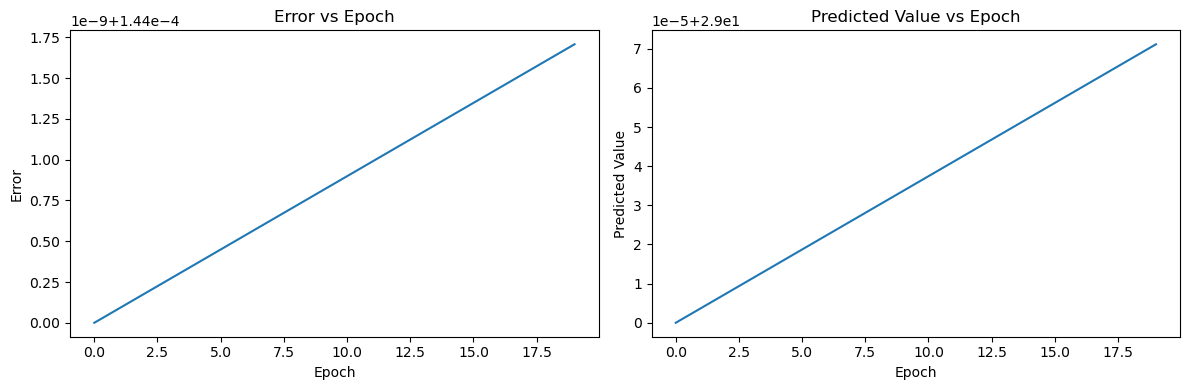

In [7]:
# Visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), errors)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Error vs Epoch")

plt.subplot(1, 2, 2)
plt.plot(range(epochs), predictions)
plt.xlabel("Epoch")
plt.ylabel("Predicted Value")
plt.title("Predicted Value vs Epoch")

plt.tight_layout()
plt.show()